In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [3]:
# Example file for testing / developing a quick understanding
filename = "../datasets/MBTA-Bus-Arrival-Departure-Times_2024-12.csv"


In [4]:
df = pd.read_csv(filename, low_memory=False)


In [5]:
# Calculate delay for each line
df['time_difference'] = pd.to_datetime(df['actual']) - pd.to_datetime(df['scheduled'])
df['delay_seconds'] = df['time_difference'].dt.total_seconds()

In [6]:
df['delay_headway'] = df['headway'] - df['scheduled_headway']

In [7]:
# Following findings from other file
filtered_df = df[(df['delay_seconds'] >= -1200) & (df['delay_seconds'] <= 1200)]

In [8]:
filtered_df['abs_delay'] = filtered_df['delay_seconds'].abs()

avg_delay_per_route = filtered_df.groupby('route_id')['abs_delay'].mean().reset_index()
avg_delay_per_route.rename(columns={'abs_delay': 'average_delay'}, inplace=True)

print(avg_delay_per_route)


C:\Users\Michael\AppData\Local\Temp\ipykernel_4360\1639101377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['abs_delay'] = filtered_df['delay_seconds'].abs()


    route_id  average_delay
0         01     244.674903
1         04     252.213329
2         07     228.969083
3         08     313.044365
4         09     265.152522
..       ...            ...
148      SL1     216.928514
149      SL2     161.876362
150      SL4     302.481612
151      SL5     235.959993
152      rad     519.000000

[153 rows x 2 columns]


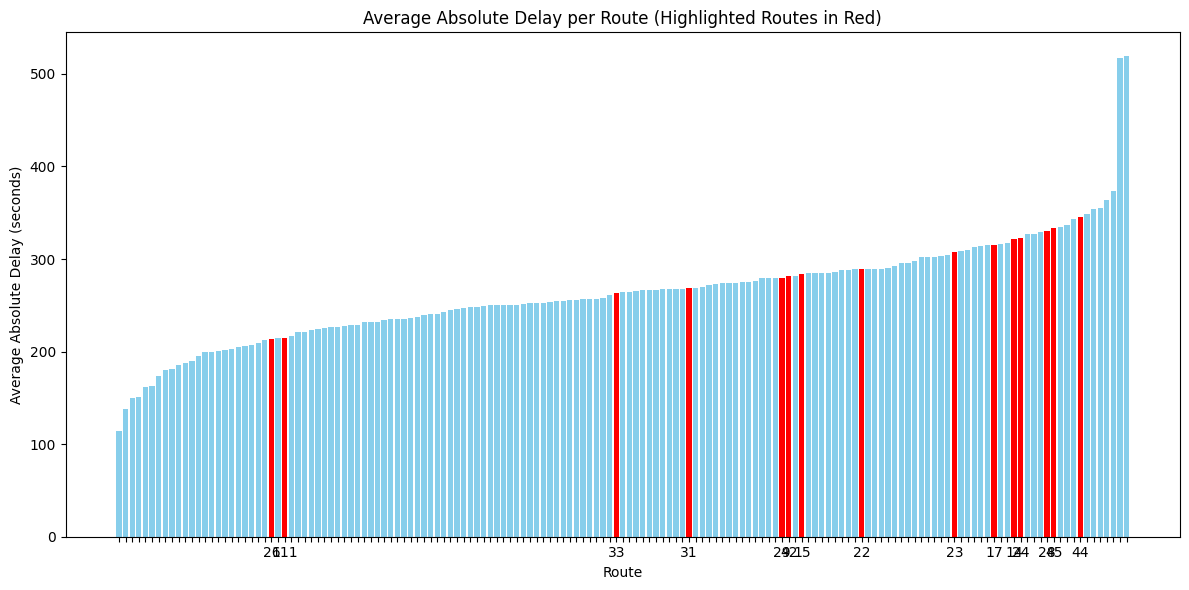

In [9]:
target_routes = {"22", "29", "15", "45", "28", "44", "42", "17", "23", "31", "26", "111", "24", "33", "14"}

avg_delay_per_route = avg_delay_per_route.sort_values(by='average_delay', ascending=True)


colors = ['red' if route in target_routes else 'skyblue' for route in avg_delay_per_route['route_id']]

tick_labels = [route if route in target_routes else '' for route in avg_delay_per_route['route_id']]


plt.figure(figsize=(12, 6))
plt.bar(avg_delay_per_route['route_id'], avg_delay_per_route['average_delay'], color=colors)
plt.xlabel('Route')
plt.ylabel('Average Absolute Delay (seconds)')
plt.title('Average Absolute Delay per Route (Highlighted Routes in Red)')
plt.xticks(range(len(avg_delay_per_route)), tick_labels)
plt.tight_layout()
plt.show()

